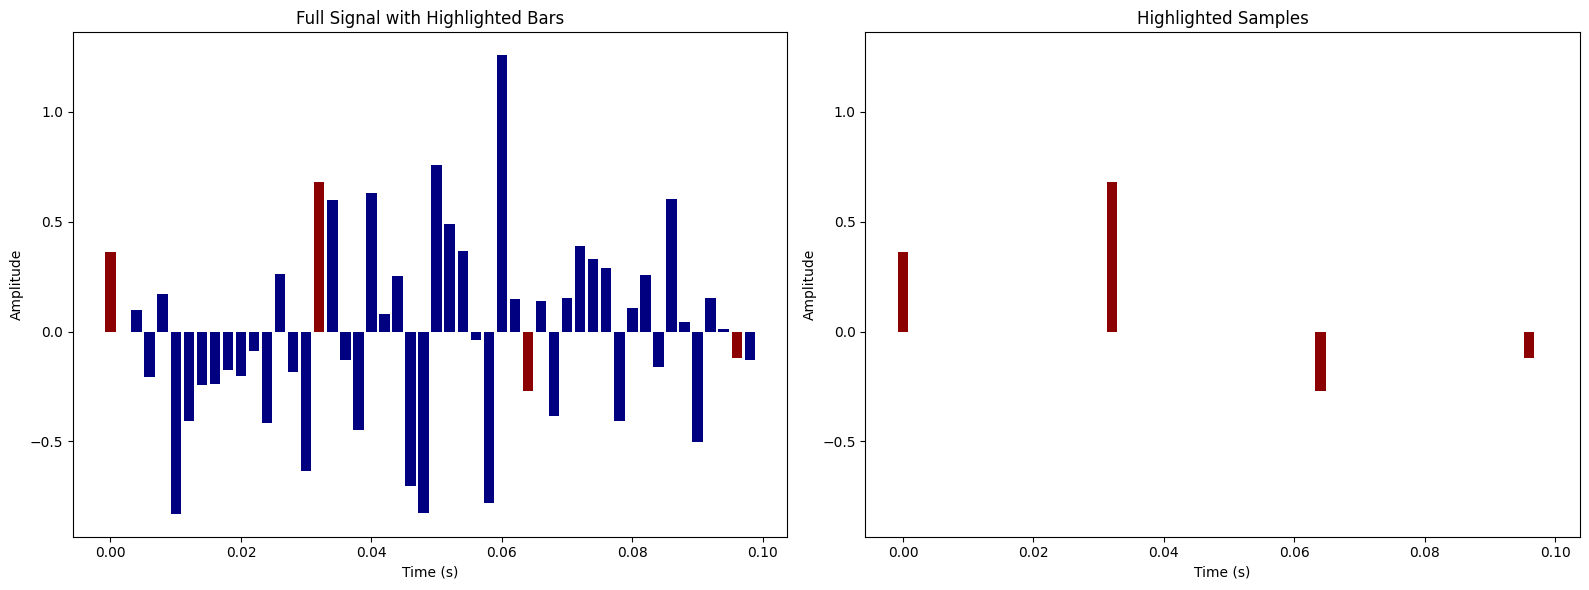

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
sampling_rate = 500  # Sampling rate in Hz
duration = 0.1  # Duration in seconds
frequency = 0.1  # Frequency of the sine wave in Hz
num_samples = int(sampling_rate * duration)  # Total number of samples
highlight_interval = 16  # Interval of samples to highlight

# Time array
t = np.linspace(0, duration, num_samples, endpoint=False)

# Generate sine wave
sine_wave = np.sin(2 * np.pi * frequency * t)

# Generate white noise
noise = np.random.normal(0, 0.5, num_samples)

# Add noise to sine wave
signal = sine_wave + noise

# Extract highlighted samples
highlight_indices = np.arange(0, num_samples, highlight_interval)
highlighted_times = t[highlight_indices]
highlighted_signal = signal[highlight_indices]

# Calculate bar width
bar_width = duration / num_samples * 0.8  # Factor for slight spacing between bars

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Plot the full signal with highlighted bars in red
for i in range(num_samples):
    color = 'darkred' if i in highlight_indices else 'navy'
    axs[0].bar(t[i], signal[i], color=color, width=bar_width)

axs[0].set_xlabel('Time (s)')
axs[0].set_ylabel('Amplitude')
axs[0].set_title('Full Signal with Highlighted Bars')
axs[0].grid(False)

# Capture the axis limits from the full signal plot
xlim = axs[0].get_xlim()
ylim = axs[0].get_ylim()

# Plot only the highlighted samples
axs[1].bar(highlighted_times, highlighted_signal, color='darkred', width=bar_width)
axs[1].set_xlabel('Time (s)')
axs[1].set_ylabel('Amplitude')
axs[1].set_title('Highlighted Samples')
axs[1].set_xlim(xlim)  # Apply the same x-axis limits
axs[1].set_ylim(ylim)  # Apply the same y-axis limits
axs[1].grid(False)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show plot
plt.show()
